# Create figures for manuscript

In [18]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

import rpy2

import os
import sys
import glob
import pickle
import pandas as pd
import numpy as np
from plotnine import (ggplot,
                      labs,  
                      geom_line, 
                      geom_errorbar,
                      aes, 
                      ggsave, 
                      theme_bw,
                      theme,
                      scale_color_manual,
                      element_blank,
                      element_text,
                      element_rect,
                      element_line,
                      coords)
import warnings
warnings.filterwarnings(action='ignore')

from numpy.random import seed
randomState = 123
seed(randomState)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [23]:
%%R
devtools::install_github("wilkelab/cowplot")


Error: Failed to install 'cowplot' from GitHub:
  error in running command


In [ ]:
%%R
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))

## Load data

In [2]:
# File directories
local_dir = "/home/alexandra/Documents/"

similarity_uncorrected_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "analysis_0_similarity_uncorrected.pickle")

ci_uncorrected_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "analysis_0_ci_uncorrected.pickle")

uncorrected_compendia_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "analysis_0_uncorrected_compendia.pickle")

similarity_corrected_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "analysis_0_similarity_corrected.pickle")

ci_corrected_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "analysis_0_ci_corrected.pickle")

corrected_compendia_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "analysis_0_corrected_compendia.pickle")

permuted_score_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "analysis_0_permuted.txt.npy")

In [3]:
# Output files
#svcca_uncorrected_file = os.path.join(
#    local_dir,
#    "Data",
#    "Batch_effects",
#    "output",
#    "analysis_0_svcca_uncorrected.png")

In [4]:
# Load pickled files
uncorrected_svcca = pd.read_pickle(similarity_uncorrected_file)
err_uncorrected_svcca = pd.read_pickle(ci_uncorrected_file)
corrected_svcca = pd.read_pickle(similarity_corrected_file)
#err_corrected_svcca = pd.read_pickle(ci_corrected_file)

#ls_uncorrected_compendia = pd.read_pickle(uncorrected_compendia_file)
#ls_corrected_compendia = pd.read_pickle(corrected_compendia_file)

permuted_score = np.load(permuted_score_file)

In [6]:
# Concatenate error bars
uncorrected_svcca_err = pd.concat([uncorrected_svcca, err_uncorrected_svcca], axis=1)
corrected_svcca_err = pd.concat([corrected_svcca, err_uncorrected_svcca], axis=1)

In [7]:
# Add group label
uncorrected_svcca_err['Group'] = 'uncorrected'
corrected_svcca_err['Group'] = 'corrected'

In [8]:
# Concatenate dataframes
all_svcca = pd.concat([uncorrected_svcca_err, corrected_svcca_err])
all_svcca

,score,ymin,ymax,Group
1,0.999994,0.999994,0.999994,uncorrected
2,0.901762,0.900810,0.902713,uncorrected
5,0.608553,0.606984,0.610122,uncorrected
10,0.130662,0.129286,0.132038,uncorrected
20,0.043638,0.041821,0.045455,uncorrected
50,0.146697,0.142185,0.151210,uncorrected
100,0.240695,0.239352,0.242039,uncorrected
500,0.727020,0.718060,0.735979,uncorrected
1000,0.936294,0.933810,0.938778,uncorrected
2000,0.964882,0.963713,0.966050,uncorrected


## SVCCA panel

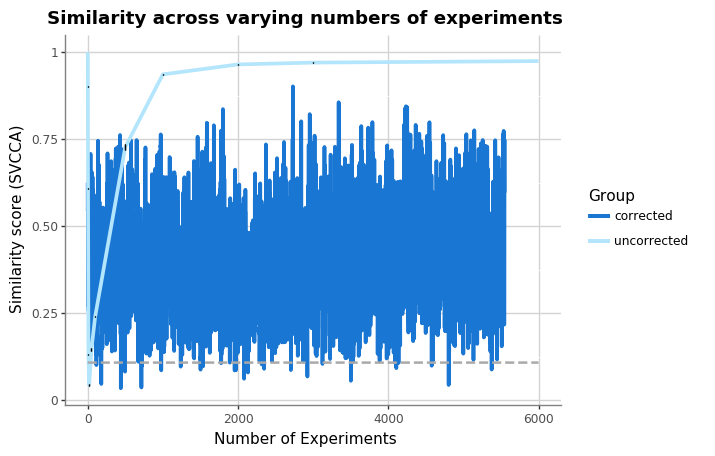

<ggplot: (8740163514365)>


In [9]:
# Plot
lst_num_experiments = list(all_svcca.index)

threshold = pd.DataFrame(
    pd.np.tile(
        permuted_score,
        (len(lst_num_experiments), 1)),
    index=lst_num_experiments,
    columns=['score'])

panel_A = ggplot(all_svcca) \
    + geom_line(all_svcca,
                aes(x=lst_num_experiments, y='score', color='Group'),
                size=1.5) \
    + geom_errorbar(all_svcca,
                  aes(x=lst_num_experiments,ymin='ymin', ymax='ymax')) \
    + geom_line(threshold, 
                aes(x=lst_num_experiments, y='score'), 
                linetype='dashed',
                size=1,
                color="darkgrey",
                show_legend=False) \
    + labs(x = "Number of Experiments", 
           y = "Similarity score (SVCCA)", 
           title = "Similarity across varying numbers of experiments") \
    + theme(plot_title=element_text(weight='bold'),
            plot_background=element_rect(fill="white"),
            panel_background=element_rect(fill="white"),
            panel_grid_major_x=element_line(color="lightgrey"),
            panel_grid_major_y=element_line(color="lightgrey"),
            axis_line=element_line(color="grey"),
            legend_key=element_rect(fill='white', colour='white')
           ) \
    + scale_color_manual(['#1976d2', '#b3e5fc']) \


print(panel_A)

## Uncorrected PCA panel

In [10]:
lst_num_experiments = [1,2,5,10,20,50,100,500,1000,2000,3000,6000]

for i in range(len(lst_num_experiments)):
    # Simulated data with all samples in a single batch
    original_data_df = ls_uncorrected_compendia[0]
    
    # Add grouping column for plotting
    original_data_df['num_experiments'] = '1'
    
    # Simulated data with i batch effects
    experiment_data_df =  ls_uncorrected_compendia[i]
    
    # Add grouping column for plotting
    experiment_data_df['num_experiments'] = 'multiple'
    
    # Concatenate datasets together
    combined_data_df = pd.concat([original_data_df, experiment_data_df])

    # PCA projection
    pca = PCA(n_components=2)

    # Encode expression data into 2D PCA space
    combined_data_numeric_df = combined_data_df.drop(['num_experiments'], axis=1)
    combined_data_PCAencoded = pca.fit_transform(combined_data_numeric_df)


    combined_data_PCAencoded_df = pd.DataFrame(combined_data_PCAencoded,
                                               index=combined_data_df.index,
                                               columns=['PC1', 'PC2']
                                              )
                                              
    # Variance explained
    print(pca.explained_variance_ratio_)  
    
    # Add back in batch labels (i.e. labels = "batch_"<how many batch effects were added>)
    combined_data_PCAencoded_df['num_experiments'] = combined_data_df['num_experiments']
    
    # Add column that designates which batch effect comparision (i.e. comparison of 1 batch vs 5 batches
    # is represented by label = 5)
    combined_data_PCAencoded_df['comparison'] = str(i)
    
    # Concatenate ALL comparisons
    all_data_df = pd.concat([all_data_df, combined_data_PCAencoded_df])

NameError: name 'ls_uncorrected_compendia' is not defined

In [ ]:
# Convert 'num_experiments' into categories to preserve the ordering
lst_num_experiments_str = [str(i) for i in lst_num_experiments]
num_experiments_cat = pd.Categorical(all_data_df['num_experiments'], categories=['1', 'multiple'])

# Convert 'comparison' into categories to preserve the ordering
comparison_cat = pd.Categorical(all_data_df['comparison'], categories=lst_num_experiments_str)

# Assign to a new column in the df
all_data_df = all_data_df.assign(num_experiments_cat = num_experiments_cat)
all_data_df = all_data_df.assign(comparison_cat = comparison_cat)

In [ ]:
all_data_df.columns = ['PC1', 'PC2', 'num_experiments', 'comparison', 'No. of experiments', 'Comparison']

In [ ]:
# Plot all comparisons in one figure
panel_B = ggplot(all_data_df, aes(x='PC1', y='PC2')) \
    + geom_point(aes(color='No. of experiments'), alpha=0.1) \
    + facet_wrap('~Comparison') \
    + labs(x = "PC 1", y = "PC 2", title = "PCA of experiment 1 vs multiple experiments") \
    + theme_bw() \
    + theme(
        legend_title_align = "center",
        plot_background=element_rect(fill='white'),
        legend_key=element_rect(fill='white', colour='white'), 
        plot_title=element_text(weight='bold')
    ) \
    + guides(colour=guide_legend(override_aes={'alpha': 1})) \
    + scale_colour_manual(['#bdbdbd', '#b3e5fc'])

print(panel_B)

## Corrected PCA panel

In [ ]:
lst_num_experiments = [1,2,5,10,20,50,100,500,1000,2000,3000,6000]

for i in range(len(lst_num_experiments)):
    # Simulated data with all samples in a single batch
    original_data_df = ls_corrected_compendia[0]
    
    # Add grouping column for plotting
    original_data_df['num_experiments'] = '1'
    
    # Simulated data with i batch effects
    experiment_data_df =  ls_corrected_compendia[i]
    
    # Add grouping column for plotting
    experiment_data_df['num_experiments'] = 'multiple'
    
    # Concatenate datasets together
    combined_data_df = pd.concat([original_data_df, experiment_data_df])

    # PCA projection
    pca = PCA(n_components=2)

    # Encode expression data into 2D PCA space
    combined_data_numeric_df = combined_data_df.drop(['num_experiments'], axis=1)
    combined_data_PCAencoded = pca.fit_transform(combined_data_numeric_df)


    combined_data_PCAencoded_df = pd.DataFrame(combined_data_PCAencoded,
                                               index=combined_data_df.index,
                                               columns=['PC1', 'PC2']
                                              )
                                              
    # Variance explained
    print(pca.explained_variance_ratio_)  
    
    # Add back in batch labels (i.e. labels = "batch_"<how many batch effects were added>)
    combined_data_PCAencoded_df['num_experiments'] = combined_data_df['num_experiments']
    
    # Add column that designates which batch effect comparision (i.e. comparison of 1 batch vs 5 batches
    # is represented by label = 5)
    combined_data_PCAencoded_df['comparison'] = str(i)
    
    # Concatenate ALL comparisons
    all_data_df = pd.concat([all_data_df, combined_data_PCAencoded_df])

In [ ]:
# Convert 'num_experiments' into categories to preserve the ordering
lst_num_experiments_str = [str(i) for i in lst_num_experiments]
num_experiments_cat = pd.Categorical(all_data_df['num_experiments'], categories=['1', 'multiple'])

# Convert 'comparison' into categories to preserve the ordering
comparison_cat = pd.Categorical(all_data_df['comparison'], categories=lst_num_experiments_str)

# Assign to a new column in the df
all_data_df = all_data_df.assign(num_experiments_cat = num_experiments_cat)
all_data_df = all_data_df.assign(comparison_cat = comparison_cat)

In [ ]:
all_data_df.columns = ['PC1', 'PC2', 'num_experiments', 'comparison', 'No. of experiments', 'Comparison']

In [ ]:
# Plot all comparisons in one figure
panel_C = ggplot(all_data_df, aes(x='PC1', y='PC2')) \
    + geom_point(aes(color='No. of experiments'), alpha=0.1) \
    + facet_wrap('~Comparison') \
    + labs(x = "PC 1", y = "PC 2", title = "PCA of experiment 1 vs multiple experiments") \
    + theme_bw() \
    + theme(
        legend_title_align = "center",
        plot_background=element_rect(fill='white'),
        legend_key=element_rect(fill='white', colour='white'), 
        plot_title=element_text(weight='bold')
    ) \
    + guides(colour=guide_legend(override_aes={'alpha': 1})) \
    + scale_colour_manual(['#bdbdbd', '#1976d2'])

print(panel_C)

## Compile panels into figure